BY HEMANT KUMAR

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Data

In [10]:
df = pd.read_csv("/content/creditcard.csv")

In [11]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [14]:
df.shape

(45646, 31)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45646 entries, 0 to 45645
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    45646 non-null  int64  
 1   V1      45646 non-null  float64
 2   V2      45646 non-null  float64
 3   V3      45646 non-null  float64
 4   V4      45646 non-null  float64
 5   V5      45646 non-null  float64
 6   V6      45645 non-null  float64
 7   V7      45645 non-null  float64
 8   V8      45645 non-null  float64
 9   V9      45645 non-null  float64
 10  V10     45645 non-null  float64
 11  V11     45645 non-null  float64
 12  V12     45645 non-null  float64
 13  V13     45645 non-null  float64
 14  V14     45645 non-null  float64
 15  V15     45645 non-null  float64
 16  V16     45645 non-null  float64
 17  V17     45645 non-null  float64
 18  V18     45645 non-null  float64
 19  V19     45645 non-null  float64
 20  V20     45645 non-null  float64
 21  V21     45645 non-null  float64
 22

In [12]:
    df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [13]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,45646.000000,45646.000000,45646.000000,45646.000000,45646.000000,45646.000000,45645.000000,45645.000000,45645.000000,45645.000000,...,45645.000000,45645.000000,45645.000000,45645.000000,45645.000000,45645.000000,45645.000000,45645.000000,45645.000000,45645.000000
mean,27545.441331,-0.237544,0.028942,0.696718,0.191505,-0.248407,0.098588,-0.117937,0.053331,0.157893,...,-0.027098,-0.108684,-0.039060,0.009358,0.136697,0.022305,0.005524,0.004641,90.829574,0.003111
std,12907.770469,1.886548,1.613070,1.530553,1.403936,1.414608,1.308548,1.282818,1.210502,1.222268,...,0.733323,0.636670,0.572037,0.592176,0.437824,0.502716,0.389241,0.338798,240.298594,0.055690
min,0.000000,-56.407510,-72.715728,-32.965346,-5.172595,-42.147898,-26.160506,-26.548144,-41.484823,-9.283925,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.438650,-8.567638,-9.617915,0.000000,0.000000
25%,19891.000000,-0.985248,-0.543868,0.222804,-0.714566,-0.853436,-0.638480,-0.600071,-0.148358,-0.589301,...,-0.232743,-0.529609,-0.179136,-0.322003,-0.128065,-0.329709,-0.063670,-0.006837,7.580000,0.000000
50%,32447.000000,-0.246259,0.088873,0.801638,0.191835,-0.280620,-0.155353,-0.073143,0.054815,0.038334,...,-0.070241,-0.083448,-0.051304,0.062230,0.175771,-0.067778,0.008425,0.021814,24.990000,0.000000
75%,37571.750000,1.157412,0.739723,1.434911,1.070924,0.287608,0.487645,0.429944,0.324345,0.859738,...,0.105614,0.303459,0.077905,0.401392,0.421857,0.302819,0.084017,0.076209,82.600000,0.000000
max,42437.000000,1.960497,18.183626,4.101716,16.491217,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,17.297845,4.014444,5.525093,3.517346,11.135740,33.847808,7879.420000,1.000000


# Data visulization

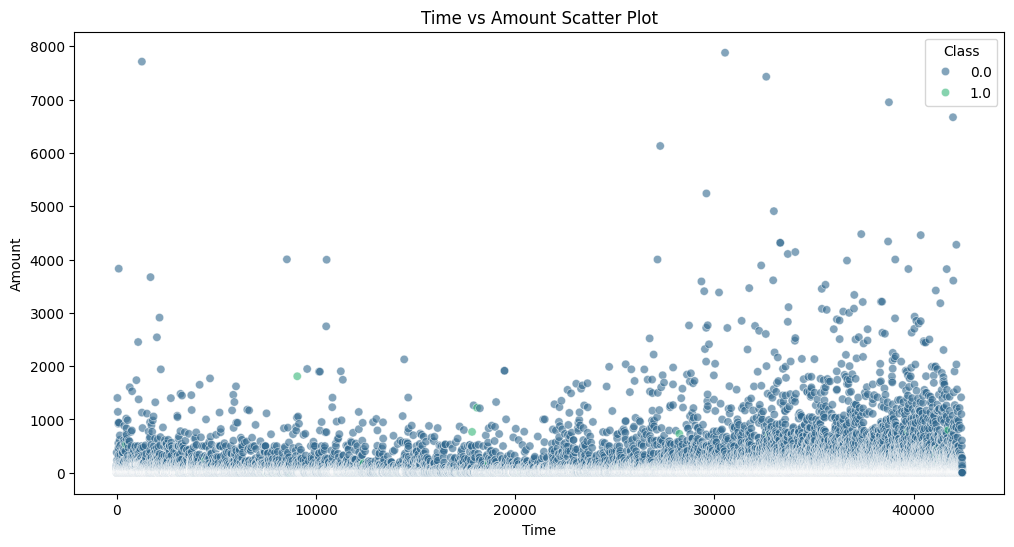

In [16]:
# 1. Time vs Amount scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Time', y='Amount', hue='Class', palette='viridis', alpha=0.6)
plt.title('Time vs Amount Scatter Plot')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.legend(title='Class')
plt.show()

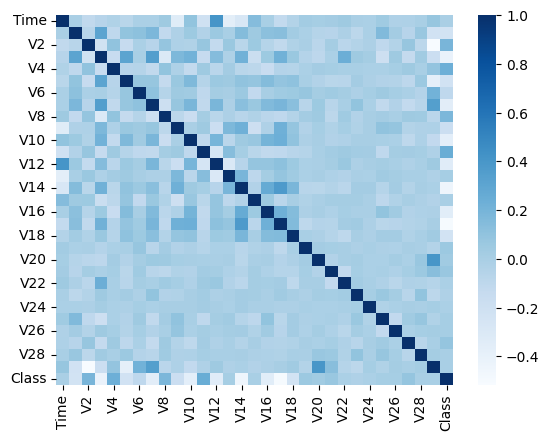

In [20]:
dataplot = sns.heatmap(df.corr(), cmap="Blues")
plt.show()

In [66]:
X = df.drop(["Time", "Class"], axis=1)
y = df['Class']

In [47]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.00000000e+00, 9.43114320e-01, 7.99158005e-01, ...,
        4.41609368e-01, 2.20791504e-01, 1.89887073e-02],
       [0.00000000e+00, 9.86831151e-01, 8.02886655e-01, ...,
        4.34375000e-01, 2.21614617e-01, 3.41395686e-04],
       [2.35643424e-05, 9.43139215e-01, 7.85215310e-01, ...,
        4.32021612e-01, 2.19901175e-01, 4.80568367e-02],
       ...,
       [9.99976436e-01, 9.87975604e-01, 8.04590358e-01, ...,
        4.33960179e-01, 2.22024885e-01, 1.12952476e-04],
       [1.00000000e+00, 9.57842588e-01, 8.10968334e-01, ...,
        4.23953764e-01, 2.16003656e-01, 3.41395686e-04],
       [1.00000000e+00, 9.55233089e-01, 8.01909083e-01, ...,
                   nan,            nan,            nan]])

In [68]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Check for NaN values in y
print("Number of NaN values in y:", np.isnan(y).sum())

# If using pandas DataFrame/Series
# Combine X and y to remove rows where y is NaN
df = pd.concat([X, y], axis=1)

# Drop rows where y is NaN
df = df.dropna(subset=[y.name])

# Split the dataframe back into X and y
X = df.drop(columns=[y.name])
y = df[y.name]

# Alternatively, fill NaN values with the most frequent value
# y = y.fillna(y.mode()[0])

# Check again for NaN values
print("Number of NaN values in y after handling:", np.isnan(y).sum())

# Proceed with the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)


Number of NaN values in y: 1
Number of NaN values in y after handling: 0


In [69]:
y_train.value_counts()

Class
0.0    36402
1.0      114
Name: count, dtype: int64

# Model

In [70]:
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [72]:
y_pred = log_reg_model.predict(X_test)
y_pred_prob = log_reg_model.predict_proba(X_test)[:, 1]

In [73]:
# Predicting for Training and Testing data
y_train_pred = log_reg_model.predict(X_train)
y_test_pred = log_reg_model.predict(X_test)

# Calculating Training and Testing accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")


Training Accuracy: 0.8580435140926322
Testing Accuracy: 0.8227117899131964


In [74]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.74      1.00      0.85      9101
         1.0       1.00      0.65      0.78      9101

    accuracy                           0.82     18202
   macro avg       0.87      0.82      0.82     18202
weighted avg       0.87      0.82      0.82     18202



# Accuracy

In [82]:
accuracy = accuracy_score(y_test,y_pred)*100
print('Accuracy score: ',accuracy)

Accuracy score:  82.27117899131964



ROC-AUC Score: 0.9862451920210122


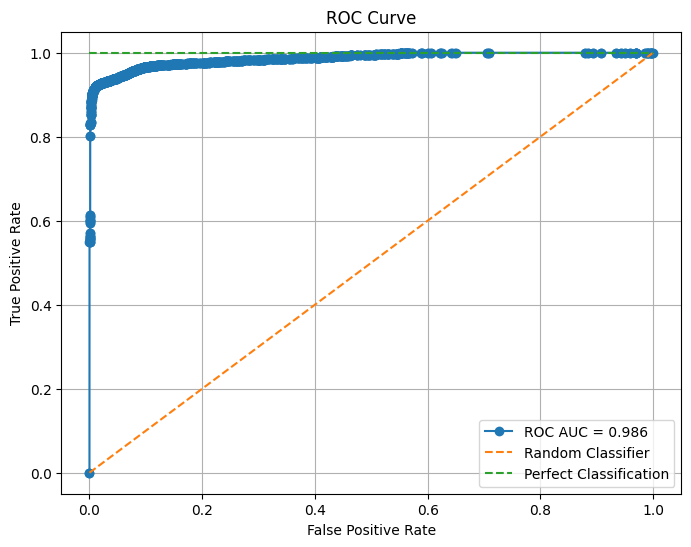

In [77]:
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"\nROC-AUC Score: {roc_auc}")

# ROC Curve with additional elements
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='o', label=f'ROC AUC = {roc_auc:.3f}')  # Marker and label customization
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
plt.plot([0, 1], [1, 1], linestyle='--', label='Perfect Classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


In [79]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print("Classification Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Classification Metrics:
Accuracy: 0.8227
Precision: 0.9980
Recall: 0.6467
F1-Score: 0.7849
